# Modellauswhal und Bewertung

In [104]:
#Bibliotheken
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
import numpy as np
import pandas as pd


In [68]:
# Laden der Daten aus der Pickle-Datei
data_dict = pickle.load(open('./data_Righ_Hand_A_Z.pickle', 'rb'))
data = np.asarray(data_dict['data'])
labels = np.asarray(data_dict['labels'])
print(len(labels))



10917


In [69]:
#Aufteilung der Daten
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, stratify=labels, shuffle=True)

## RandomForestClassifier

In [107]:
#Definition der Hyperparameter
hyperparameter_search_space = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [2,5, 10, 20, 30, 40],
 
}


In [108]:

#Initialisierung der Grid Search mit Random Forest-Algorithmus
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=hyperparameter_search_space, scoring='accuracy', cv=5,return_train_score=True)

#Training
grid_search.fit(x_train, y_train)
#Erstellung eines Ergebnis DaraFrame
result_frame =pd.DataFrame(grid_search.cv_results_)
result_frame

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.848444,0.025852,0.015903,0.008096,2,50,"{'max_depth': 2, 'n_estimators': 50}",0.916285,0.863874,0.895288,...,0.898178,0.021539,23,0.924411,0.862915,0.903157,0.922624,0.895959,0.901813,0.022329
1,1.780407,0.095312,0.018190,0.010188,2,100,"{'max_depth': 2, 'n_estimators': 100}",0.892086,0.894634,0.890052,...,0.892553,0.002389,24,0.898397,0.895305,0.893178,0.894651,0.897759,0.895858,0.001949
2,3.634935,0.182290,0.041733,0.006930,2,200,"{'max_depth': 2, 'n_estimators': 200}",0.885546,0.899869,0.889398,...,0.901193,0.016339,22,0.894797,0.900376,0.895305,0.899068,0.936529,0.905215,0.015802
3,5.668108,0.306241,0.055727,0.006683,2,300,"{'max_depth': 2, 'n_estimators': 300}",0.921517,0.905759,0.896597,...,0.906686,0.009025,21,0.930955,0.902503,0.901194,0.897105,0.911173,0.908586,0.012088
4,1.994648,0.010316,0.011076,0.006187,5,50,"{'max_depth': 5, 'n_estimators': 50}",0.963375,0.971204,0.969895,...,0.971602,0.005189,20,0.965969,0.980860,0.965974,0.974153,0.980533,0.973498,0.006594
5,3.920412,0.076821,0.025078,0.007724,5,100,"{'max_depth': 5, 'n_estimators': 100}",0.982341,0.977749,0.982330,...,0.979845,0.002208,19,0.979876,0.986586,0.985114,0.982823,0.975626,0.982005,0.003913
6,7.838263,0.143193,0.042754,0.006177,5,200,"{'max_depth': 5, 'n_estimators': 200}",0.984957,0.973822,0.982330,...,0.980630,0.003718,18,0.985111,0.984623,0.982987,0.982660,0.982987,0.983674,0.000994
7,11.691473,0.049964,0.055823,0.005899,5,300,"{'max_depth': 5, 'n_estimators': 300}",0.984303,0.977749,0.982984,...,0.981154,0.002430,17,0.983475,0.986095,0.985604,0.981515,0.983969,0.984132,0.001633
8,3.025328,0.125961,0.018845,0.006219,10,50,"{'max_depth': 10, 'n_estimators': 50}",0.998038,0.996073,0.999346,...,0.997644,0.001141,13,1.000000,0.999673,1.000000,0.999836,0.999509,0.999804,0.000191
9,6.755261,1.240285,0.023319,0.007281,10,100,"{'max_depth': 10, 'n_estimators': 100}",0.998038,0.996073,0.999346,...,0.997382,0.001171,14,0.999836,1.000000,0.999836,0.999836,0.999509,0.999804,0.000160


In [64]:
# Speichung der Ergebnisse in eine csv-Datei
result_frame.to_csv('GridSearchCV_RandomForest_Classifier.csv', index=False)


In [94]:
#Bestimmte Spalten ausgeben
result_frame[['rank_test_score','mean_train_score','mean_test_score','params']]

,rank_test_score,mean_train_score,mean_test_score,params
0,24,0.884276,0.882082,"{'max_depth': 2, 'n_estimators': 50}"
1,23,0.905117,0.902500,"{'max_depth': 2, 'n_estimators': 100}"
2,22,0.914017,0.912313,"{'max_depth': 2, 'n_estimators': 200}"
3,21,0.916209,0.912444,"{'max_depth': 2, 'n_estimators': 300}"
4,20,0.980075,0.974087,"{'max_depth': 5, 'n_estimators': 50}"
5,19,0.982463,0.978275,"{'max_depth': 5, 'n_estimators': 100}"
6,18,0.982692,0.978536,"{'max_depth': 5, 'n_estimators': 200}"
7,17,0.983379,0.980369,"{'max_depth': 5, 'n_estimators': 300}"
8,14,0.999902,0.998037,"{'max_depth': 10, 'n_estimators': 50}"
9,16,0.999967,0.997775,"{'max_depth': 10, 'n_estimators': 100}"


In [ ]:
##### Daten aus der gespeichete Datei extrahieren(GridSearchCV_RandomForest_Classifier.csv)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import json

# Die gespeicherte Datei in einen DataFrame umwandeln
file_path = 'GridSearchCV_RandomForest_Classifier.csv'
result_frame = pd.read_csv(file_path)

# Entnehmen und Umwandeln der 'params' Spalte in Python-Dictionaries
params = result_frame['params'].apply(lambda x: json.loads(x.replace("'", "\"")))

# Extrahieren der max_depth und n_estimators Werte
max_depth_values = [param['max_depth'] for param in params]
n_estimators_values = [param['n_estimators'] for param in params]

# max_depth und n_estimators als Spalten in der DataFrame einfügen
result_frame['max_depth'] = max_depth_values
result_frame['n_estimators'] = n_estimators_values


##### mean_train_score Diagramm(RandomForest) 

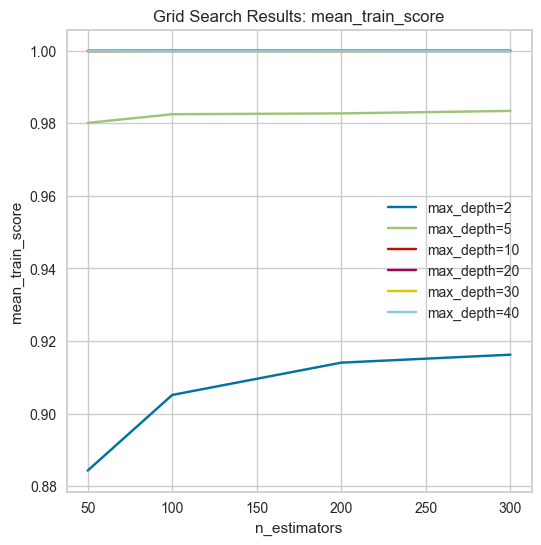

In [110]:

# Filtern der Daten nach max_depth
max_depth_values = result_frame['max_depth'].unique()
plt.figure(figsize=(6, 6))
for max_depth in max_depth_values:
    filtered_data = result_frame[result_frame['max_depth'] == max_depth]
    
    #Linienplots für mean_train_score Werte erstellen
    plt.plot(filtered_data['n_estimators'], filtered_data['mean_train_score'], label=f'max_depth={max_depth}')

# mean_train_score Diagramm 
plt.xlabel('n_estimators')
plt.ylabel('mean_train_score')
plt.legend()
plt.title('Grid Search Results: mean_train_score')
plt.grid(True)

#Ausgabe
plt.show()



##### Mean_Test_score Diagramm(RandomForest) 

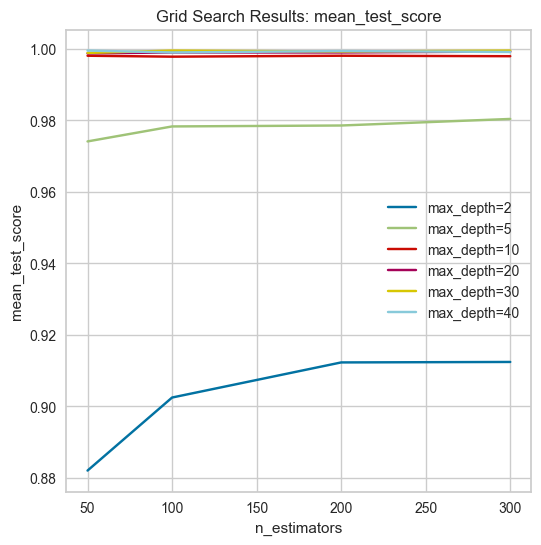

In [111]:

# Filtern der Daten nach max_depth

max_depth_values = result_frame['max_depth'].unique()
plt.figure(figsize=(6, 6))

for max_depth in max_depth_values:
    
    filtered_data = result_frame[result_frame['max_depth'] == max_depth]
    
    # Linienplots für die mean_test_score Werte erstellen
    plt.plot(filtered_data['n_estimators'], filtered_data['mean_test_score'], label=f'max_depth={max_depth}')

# mean_test_score Diagramm
plt.xlabel('n_estimators')
plt.ylabel('mean_test_score')
plt.legend()
plt.title('Grid Search Results: mean_test_score')
plt.grid(True)

# Ausgabe(mean_test_score)
plt.show()


##### Grid Search Results: Score Difference

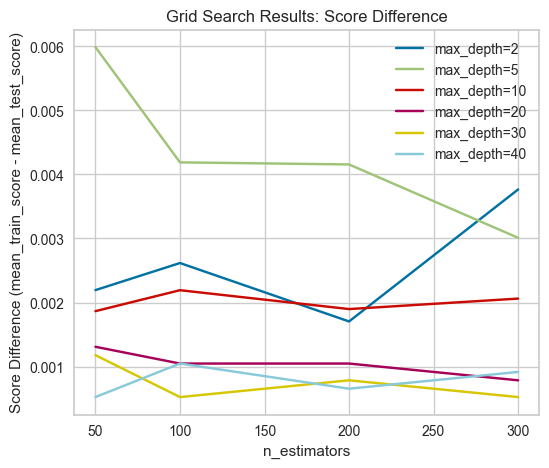

In [113]:
# Brechnung der Differenz zwischen mean_train_score und mean_test_score
result_frame['score_difference'] = result_frame['mean_train_score'] - result_frame['mean_test_score']

# Filtern der Daten nach max_depth
max_depth_values = result_frame['max_depth'].unique()
plt.figure(figsize=(6, 5))
for max_depth in max_depth_values:
    filtered_data = result_frame[result_frame['max_depth'] == max_depth]
    
    # Linienplots für die Score-Differenz erstellen
    plt.plot(filtered_data['n_estimators'], filtered_data['score_difference'], label=f'max_depth={max_depth}')

# Score Difference Diagramm
plt.xlabel('n_estimators')
plt.ylabel('Score Difference (mean_train_score - mean_test_score)')
plt.legend()
plt.title('Grid Search Results: Score Difference')
plt.grid(True)

# Ausgabe(Score Difference Diagramm)
plt.show()

##### Konfusionsmatrix (Random Forest)

Cross-Validation Accuracy :  99.89528795811518 %
Accuracy :  100.0 %


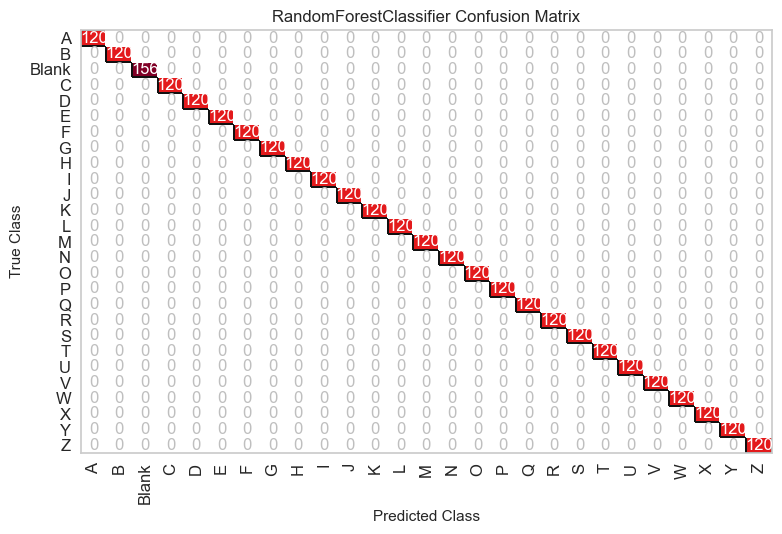

<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [166]:
from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix

#Erstellung des Random Forest Klassifikators
random_forest_model = RandomForestClassifier(max_depth= 30, n_estimators= 100,random_state=None)

kfold = KFold(n_splits=5) 
scores = cross_val_score(random_forest_model, x_train, y_train, cv=kfold, scoring='accuracy')
average_accuracy = scores.mean()
print('Cross-Validation Accuracy : ', average_accuracy * 100, '%')

random_forest_model_after_val = random_forest_model.fit(x_train, y_train)
test_accuracy = random_forest_model_after_val.score(x_test, y_test)
print('Accuracy : ', test_accuracy * 100, '%')

#Vorhersage der Labels für die Testdaten
y_predict = random_forest_model_after_val.predict(x_test)

#Erstellung der ConfusionMatrix
cm = ConfusionMatrix(random_forest_model_after_val, classes=np.unique(labels))
cm.fit(x_train, y_train)
cm.score(x_test, y_test)
cm.show()


In [141]:

#Klassifizierungsbericht für alle Klassen
report = classification_report(y_test, y_predict)
print(report)

              precision    recall  f1-score   support

           A       1.00      1.00      1.00       120
           B       1.00      1.00      1.00       120
       Blank       1.00      1.00      1.00       156
           C       1.00      1.00      1.00       120
           D       1.00      1.00      1.00       120
           E       1.00      1.00      1.00       120
           F       1.00      1.00      1.00       120
           G       1.00      1.00      1.00       120
           H       1.00      1.00      1.00       120
           I       1.00      1.00      1.00       120
           J       0.99      0.99      0.99       120
           K       1.00      1.00      1.00       120
           L       1.00      1.00      1.00       120
           M       1.00      1.00      1.00       120
           N       1.00      1.00      1.00       120
           O       1.00      1.00      1.00       120
           P       1.00      1.00      1.00       120
           Q       1.00    

Cross-Validation Accuracy :  99.69897000058211 %
Accuracy :  99.75579975579976 %


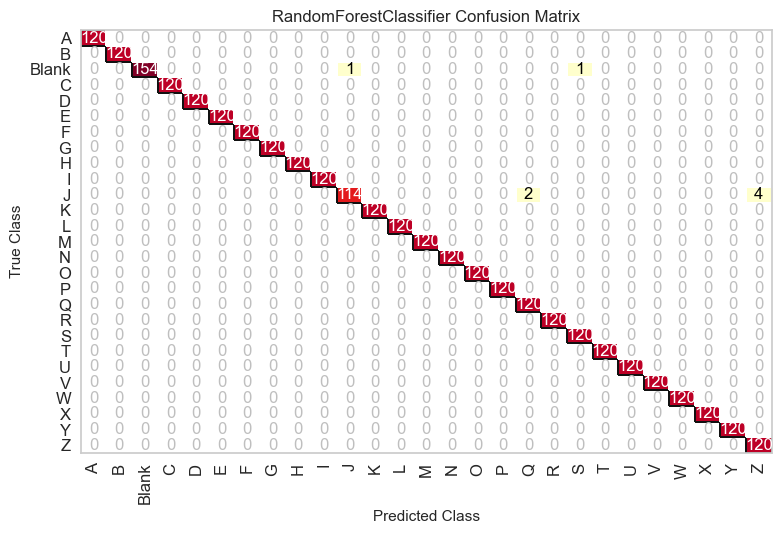

<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [170]:
#Bestes experimentelles Random Forest Modell
from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix

#Erstellung des Random Forest Klassifikators
random_forest_model_2 = RandomForestClassifier(max_depth= 9, n_estimators= 100,random_state=None)

kfold = KFold(n_splits=5) 
scores = cross_val_score(random_forest_model_2, x_train, y_train, cv=kfold, scoring='accuracy')
average_accuracy = scores.mean()
print('Cross-Validation Accuracy : ', average_accuracy * 100, '%')

random_forest_model_after_val_2 = random_forest_model_2.fit(x_train, y_train)
test_accuracy = random_forest_model_after_val_2.score(x_test, y_test)
print('Accuracy : ', test_accuracy * 100, '%')

#Vorhersage der Labels für die Testdaten
y_predict = random_forest_model_after_val_2.predict(x_test)

#Erstellung der ConfusionMatrix
cm = ConfusionMatrix(random_forest_model_after_val_2, classes=np.unique(labels))
cm.fit(x_train, y_train)
cm.score(x_test, y_test)
cm.show()


## Support Vector Classification

### LinearSVC

In [202]:
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split, GridSearchCV
#Hyperparameter search space
hyperparameter_search_space_svm = {
    'C': [0.001, 0.01, 0.1, 0.5, 1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000]  
}

#Initialisierung der linearer SVM-Modells
svc = LinearSVC(dual='auto')

#Grid Search 
grid_search_LinearSVC = GridSearchCV(estimator=svc, param_grid=hyperparameter_search_space_svm, scoring='accuracy', cv=5, n_jobs=-1,return_train_score=True)

#Durchführen der Grid Search
grid_search_LinearSVC.fit(x_train, y_train)

#Erstellung eines Ergebnisdatenrahmens
result_frame_LinearSVC =pd.DataFrame(grid_search_LinearSVC.cv_results_)
result_frame_LinearSVC

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.160940,0.060947,0.004948,0.003435,0.001,{'C': 0.001},0.902551,0.901832,0.899869,0.908377,...,0.903809,0.003120,15,0.904123,0.902830,0.905775,0.904139,0.904629,0.904299,0.000949
1,2.989435,0.078646,0.005335,0.004287,0.01,{'C': 0.01},0.950948,0.956806,0.947644,0.949607,...,0.949876,0.004112,14,0.950262,0.948798,0.949943,0.949616,0.953051,0.950334,0.001443
2,2.789510,0.063777,0.006429,0.002558,0.1,{'C': 0.1},0.987574,0.988220,0.986911,0.983639,...,0.985604,0.002519,13,0.986420,0.986422,0.985768,0.987077,0.988058,0.986749,0.000774
3,2.983691,0.248401,0.002026,0.004053,0.5,{'C': 0.5},0.994114,0.991492,0.994110,0.993455,...,0.991886,0.002974,12,0.993455,0.993620,0.992802,0.992802,0.993784,0.993293,0.000414
4,2.893959,0.325919,0.007579,0.010522,1,{'C': 1},0.996730,0.993455,0.995419,0.994110,...,0.993456,0.003153,11,0.995582,0.995420,0.995092,0.995583,0.995420,0.995419,0.000179
5,3.053513,0.578212,0.004255,0.006321,2,{'C': 2},0.997384,0.996073,0.996728,0.996073,...,0.995419,0.002342,10,0.996891,0.997055,0.996892,0.996565,0.997383,0.996957,0.000266
6,4.166786,0.333776,0.009744,0.012226,5,{'C': 5},0.998038,0.997382,0.999346,0.996728,...,0.996990,0.001968,9,0.998855,0.999018,0.998364,0.998855,0.999182,0.998855,0.000274
7,4.275010,0.588137,0.003996,0.005617,10,{'C': 10},0.998692,0.997382,0.999346,0.996728,...,0.997251,0.001823,8,0.999018,0.999018,0.998691,0.999018,0.999346,0.999018,0.000207
8,3.765782,0.498609,0.002395,0.001354,20,{'C': 20},0.998692,0.997382,0.999346,0.998037,...,0.997775,0.001348,7,0.999182,0.999182,0.999018,0.999018,0.999509,0.999182,0.000179
9,4.198425,0.516199,0.005922,0.005884,50,{'C': 50},0.998692,0.997382,0.999346,0.999346,...,0.998037,0.001492,4,0.999509,0.999673,0.999346,0.999509,0.999836,0.999575,0.000167


In [203]:
# Speichung der Ergebnisse in eine csv-Datei
result_frame_LinearSVC.to_csv('GridSearchCV_LinearSVC_Classifier.csv', index=False)


In [204]:
#Bestimmte spalten ausgeben
result_frame_LinearSVC[['rank_test_score','mean_train_score','mean_test_score','params']]

,rank_test_score,mean_train_score,mean_test_score,params
0,15,0.904299,0.903809,{'C': 0.001}
1,14,0.950334,0.949876,{'C': 0.01}
2,13,0.986749,0.985604,{'C': 0.1}
3,12,0.993293,0.991886,{'C': 0.5}
4,11,0.995419,0.993456,{'C': 1}
5,10,0.996957,0.995419,{'C': 2}
6,9,0.998855,0.996990,{'C': 5}
7,8,0.999018,0.997251,{'C': 10}
8,7,0.999182,0.997775,{'C': 20}
9,4,0.999575,0.998037,{'C': 50}


In [205]:
import pandas as pd
import matplotlib.pyplot as plt
import ast

#Daten aus der CSV-Datei
file_path = 'GridSearchCV_LinearSVC_Classifier.csv'
result_frame_LinearSVC = pd.read_csv(file_path)

#Umwandeln der 'params'-Spalte in Python-Dictionaries
result_frame_LinearSVC['params'] = result_frame_LinearSVC['params'].apply(ast.literal_eval)

#'mean_train_score' und 'mean_test_score' in Abhängigkeit von 'C'
data_mean_train = result_frame_LinearSVC[['param_C', 'mean_train_score']]
data_mean_test = result_frame_LinearSVC[['param_C', 'mean_test_score']]


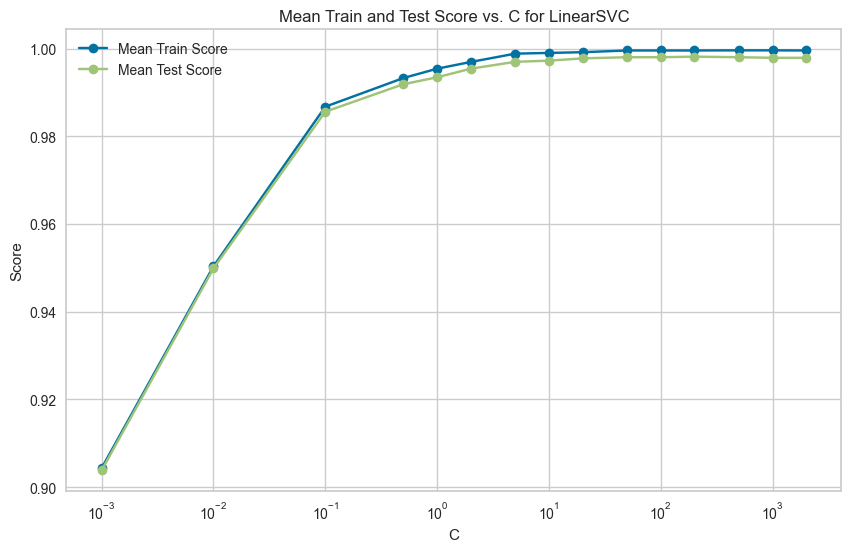

In [206]:
#Erstellung der Linienplots
plt.figure(figsize=(10, 6))
plt.plot(data_mean_train['param_C'], data_mean_train['mean_train_score'], label='Mean Train Score', marker='o')
plt.plot(data_mean_test['param_C'], data_mean_test['mean_test_score'], label='Mean Test Score', marker='o')
plt.title('Mean Train and Test Score vs. C for LinearSVC')
plt.xlabel('C')
plt.ylabel('Score')
plt.xscale('log')  
plt.legend()
plt.grid(True)
plt.show()

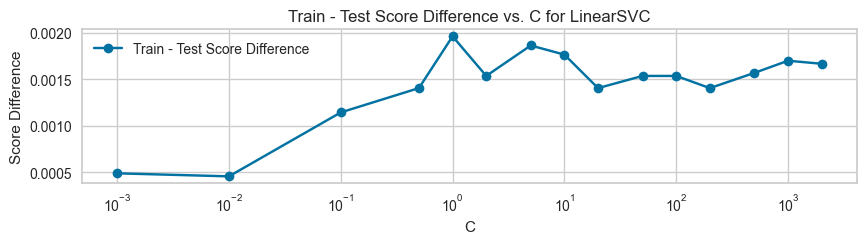

In [207]:

#Berechnung der Differenz
result_frame_LinearSVC['score_difference'] = result_frame_LinearSVC['mean_train_score'] - result_frame_LinearSVC['mean_test_score']

#Erstellung des Linienplots
plt.figure(figsize=(10, 2))
plt.plot(result_frame_LinearSVC['param_C'], result_frame_LinearSVC['score_difference'], label='Train - Test Score Difference', marker='o')
plt.title('Train - Test Score Difference vs. C for LinearSVC')
plt.xlabel('C')
plt.ylabel('Score Difference')
plt.xscale('log')
plt.legend()
plt.grid(True)
plt.show()


### rank_test_score(LinearSVC mit C='50')

Cross-Validation Accuracy :  99.79059303723133 %
Accuracy :  99.78632478632478 %


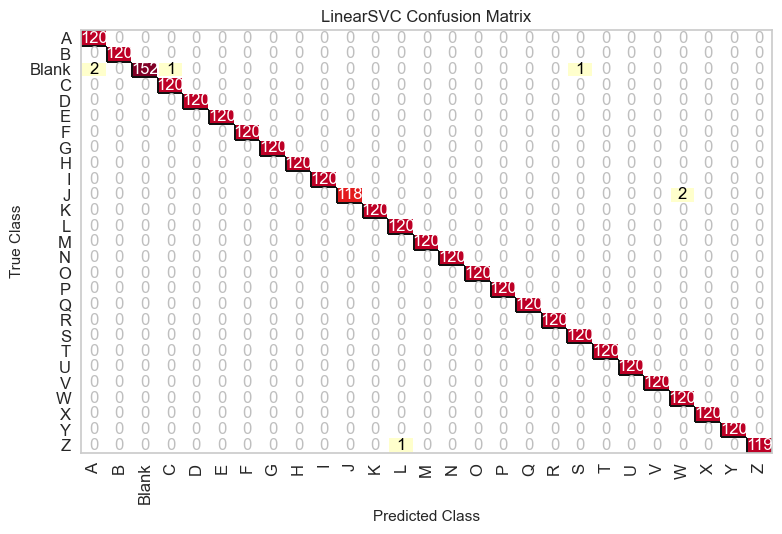

<Axes: title={'center': 'LinearSVC Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [220]:
from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix


LinearSVC_model_C_50 = LinearSVC(C=50,dual='auto')

kfold = KFold(n_splits=5) 
scores = cross_val_score(LinearSVC_model_C_50, x_train, y_train, cv=kfold, scoring='accuracy')
average_accuracy = scores.mean()
print('Cross-Validation Accuracy : ', average_accuracy * 100, '%')

LinearSVC_model_C_50_after_val = LinearSVC_model_C_50.fit(x_train, y_train)
test_accuracy = LinearSVC_model_C_50_after_val.score(x_test, y_test)
print('Accuracy : ', test_accuracy * 100, '%')

#Vorhersage der Labels für die Testdaten
y_predict = LinearSVC_model_C_50_after_val.predict(x_test)

#Erstellung der ConfusionMatrix
cm = ConfusionMatrix(LinearSVC_model_C_50_after_val, classes=np.unique(labels))
cm.fit(x_train, y_train)
cm.score(x_test, y_test)
cm.show()

In [221]:
#Klassifizierungsbericht für alle Klassen
report_LinearSVC_model_C_50 = classification_report(y_test, y_predict)
print(report_LinearSVC_model_C_50)

              precision    recall  f1-score   support

           A       0.98      1.00      0.99       120
           B       1.00      1.00      1.00       120
       Blank       1.00      0.97      0.99       156
           C       0.99      1.00      1.00       120
           D       1.00      1.00      1.00       120
           E       1.00      1.00      1.00       120
           F       1.00      1.00      1.00       120
           G       1.00      1.00      1.00       120
           H       1.00      1.00      1.00       120
           I       1.00      1.00      1.00       120
           J       1.00      0.98      0.99       120
           K       1.00      1.00      1.00       120
           L       0.99      1.00      1.00       120
           M       1.00      1.00      1.00       120
           N       1.00      1.00      1.00       120
           O       1.00      1.00      1.00       120
           P       1.00      1.00      1.00       120
           Q       1.00    

In [216]:
#'mean_test_score' größer oder gleich 0.95
filtered_df = result_frame_LinearSVC[result_frame_LinearSVC['mean_test_score'] >= 0.95]

#'score_difference' in aufsteigender Reihenfolge
sorted_df = filtered_df.sort_values(by='score_difference', ascending=True)

#obersten 5 Zeilen aus dem sortierten DataFrame
top_5 = sorted_df.head(5)[['param_C', 'mean_test_score','score_difference']]

print(top_5)
first_param_C = top_5.iloc[0]['param_C']


    param_C  mean_test_score  score_difference
2       0.1         0.985604          0.001145
11    200.0         0.998168          0.001407
8      20.0         0.997775          0.001407
3       0.5         0.991886          0.001407
10    100.0         0.998037          0.001538


In [77]:
from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.svm import SVC, LinearSVC

highest_cross_val = 0.0
# Definition der auffälligen C-Parameter
c_parameters = [0.1, 200, 20, 0.5, 100]
model_nr=[2,11,8,3,10]
validation_values = []  

best_c_value = 0

for index, c in enumerate(c_parameters):
    # Erstellung des LinearSVC Klassifikators
    best_LinearSVC_model = LinearSVC(C=c, dual='auto')

    kfold = KFold(n_splits=5)
    scores = cross_val_score(best_LinearSVC_model, x_train, y_train, cv=kfold, scoring='accuracy')
    average_accuracy = scores.mean()
    
    # Hinzufügen des Durchschnittswerts zur Liste
    validation_values.append(average_accuracy)

    print('Model Nr.',model_nr[index],' mit C = ', c)
    print('Cross-Validation Accuracy : ', average_accuracy * 100, '%')
    
    if average_accuracy >= highest_cross_val:
        highest_cross_val = average_accuracy
        best_c_value = c

    best_LinearSVC_model_after_validation = best_LinearSVC_model.fit(x_train, y_train)
    test_accuracy = best_LinearSVC_model_after_validation.score(x_test, y_test)
    print('Accuracy : ', test_accuracy * 100, '%\n')

# Vorhersage der Labels für die Testdaten
y_predict = best_LinearSVC_model_after_validation.predict(x_test)

print("Bestes LinearSVC Modell  (C = " + str(best_c_value) + " und Cross-Validation Accuracy: " + str(highest_cross_val) + ")")


Model Nr. 2  mit C =  0.1
Cross-Validation Accuracy :  98.49493560791538 %
Accuracy :  98.96214896214897 %

Model Nr. 11  mit C =  200
Cross-Validation Accuracy :  99.80367348196644 %
Accuracy :  99.75579975579976 %

Model Nr. 8  mit C =  20
Cross-Validation Accuracy :  99.77749547149524 %
Accuracy :  99.75579975579976 %

Model Nr. 3  mit C =  0.5
Cross-Validation Accuracy :  99.12312225421948 %
Accuracy :  99.42002442002442 %

Model Nr. 10  mit C =  100
Cross-Validation Accuracy :  99.80367348196646 %
Accuracy :  99.72527472527473 %

Bestes LinearSVC Modell  (C = 100 und Cross-Validation Accuracy: 0.9980367348196646)


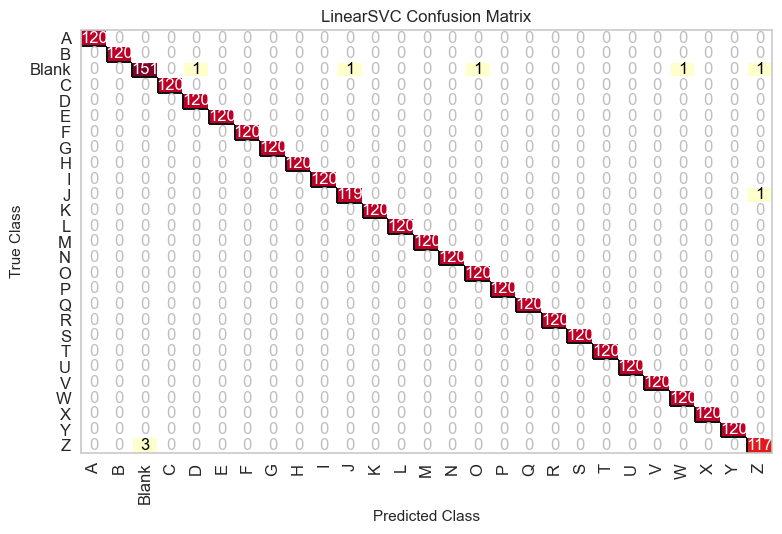

<Axes: title={'center': 'LinearSVC Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [78]:
#Erstellung der ConfusionMatrix
cm = ConfusionMatrix(best_LinearSVC_model_after_validation, classes=np.unique(labels))
cm.fit(x_train, y_train)
cm.score(x_test, y_test)
cm.show()

###  Beste LinearSVC Model(LinearSVC mit C='100')

Cross-Validation Accuracy :  99.80367348196646 %
Accuracy :  99.72527472527473 %


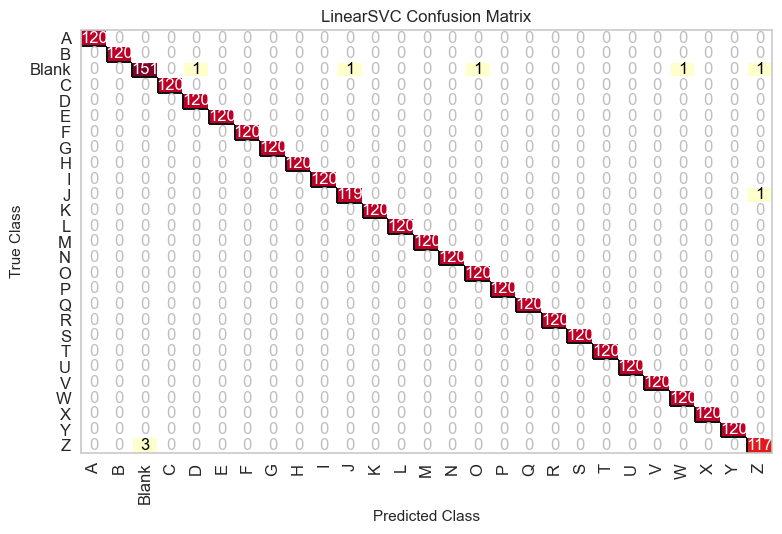

<Axes: title={'center': 'LinearSVC Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [79]:
from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.svm import LinearSVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np

#Erstellung des SVC Klassifikators
LinearSVC_model_C_100 = LinearSVC(C=100,dual='auto')

kfold = KFold(n_splits=5) 
scores = cross_val_score(LinearSVC_model_C_100, x_train, y_train, cv=kfold, scoring='accuracy')
average_accuracy = scores.mean()
print('Cross-Validation Accuracy : ', average_accuracy * 100, '%')

LinearSVC_model_C_100_after_val = LinearSVC_model_C_100.fit(x_train, y_train)
test_accuracy = LinearSVC_model_C_100_after_val.score(x_test, y_test)
print('Accuracy : ', test_accuracy * 100, '%')

#Vorhersage der Labels für die Testdaten
y_predict = LinearSVC_model_C_100_after_val.predict(x_test)

#Erstellung der ConfusionMatrix
cm = ConfusionMatrix(LinearSVC_model_C_100_after_val, classes=np.unique(labels))
cm.fit(x_train, y_train)
cm.score(x_test, y_test)
cm.show()

## Support vector machines (nicht linear)

### Verwendung von Grid Search

In [223]:
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split, GridSearchCV
#Hyperparameter search space
hyperparameter_search_space_svm = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'kernel': [ 'rbf'],
    'gamma': [0.0001, 0.001, 0.01, 0.1, 'auto', 'scale']
}

#Initialisierung der linearer SVM-Modells
svm_svc = SVC()

#Grid Search 
grid_search_svm_svc = GridSearchCV(estimator=svm_svc, param_grid=hyperparameter_search_space_svm, scoring='accuracy', cv=5, n_jobs=-1,return_train_score=True)

#Durchführen der Grid Search
grid_search_svm_svc.fit(x_train, y_train)

#Erstellung eines Ergebnisdatenrahmens
grid_search_svm_svc =pd.DataFrame(grid_search_svm_svc.cv_results_)
grid_search_svm_svc

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,6.913031,0.206255,3.581825,0.249013,0.001,0.0001,rbf,"{'C': 0.001, 'gamma': 0.0001, 'kernel': 'rbf'}",0.047744,0.047120,...,0.047638,0.000259,18,0.047611,0.047767,0.047603,0.047603,0.047603,0.047638,0.000065
1,7.488543,0.741778,12.145809,17.458679,0.001,0.001,rbf,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}",0.047744,0.047120,...,0.047638,0.000259,18,0.047611,0.047767,0.047603,0.047603,0.047603,0.047638,0.000065
2,8.203300,0.064066,4.847995,0.689707,0.001,0.01,rbf,"{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}",0.047744,0.047120,...,0.047638,0.000259,18,0.047611,0.047767,0.047603,0.047603,0.047603,0.047638,0.000065
3,9.503110,1.023936,3.819493,1.126116,0.001,0.1,rbf,"{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}",0.047744,0.047120,...,0.047638,0.000259,18,0.047611,0.047767,0.047603,0.047603,0.047603,0.047638,0.000065
4,13.202463,2.634062,4.398017,0.656096,0.001,auto,rbf,"{'C': 0.001, 'gamma': 'auto', 'kernel': 'rbf'}",0.047744,0.047120,...,0.047638,0.000259,18,0.047611,0.047767,0.047603,0.047603,0.047603,0.047638,0.000065
5,15.811110,0.848437,4.556601,0.610973,0.001,scale,rbf,"{'C': 0.001, 'gamma': 'scale', 'kernel': 'rbf'}",0.047744,0.047120,...,0.047638,0.000259,18,0.047611,0.047767,0.047603,0.047603,0.047603,0.047638,0.000065
6,10.436707,0.927360,3.181613,0.147907,0.01,0.0001,rbf,"{'C': 0.01, 'gamma': 0.0001, 'kernel': 'rbf'}",0.047744,0.047120,...,0.047638,0.000259,18,0.047611,0.047767,0.047603,0.047603,0.047603,0.047638,0.000065
7,9.258133,0.872333,3.263921,0.273887,0.01,0.001,rbf,"{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}",0.047744,0.047120,...,0.047638,0.000259,18,0.047611,0.047767,0.047603,0.047603,0.047603,0.047638,0.000065
8,9.187568,0.321761,3.515283,0.601329,0.01,0.01,rbf,"{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}",0.047744,0.047120,...,0.047638,0.000259,18,0.047611,0.047767,0.047603,0.047603,0.047603,0.047638,0.000065
9,9.346778,0.315943,3.799907,0.640317,0.01,0.1,rbf,"{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}",0.190320,0.189791,...,0.190944,0.001280,16,0.191427,0.191068,0.190414,0.191395,0.191395,0.191140,0.000386


In [224]:
# Speichung der Ergebnisse in eine csv-Datei
grid_search_svm_svc.to_csv('GridSearchCV_svm_svc_classifier.csv', index=False)

##### Daten aus der gespeicherten Datei einlesen.

In [226]:
import pandas as pd
import matplotlib.pyplot as plt
import ast

#Einlesen aus der datei
file_path = 'GridSearchCV_svm_svc_classifier.csv'
result_frame_svc_svm = pd.read_csv(file_path)

#'params'-Spalte in Python-Dictionaries
result_frame_svc_svm['params'] = result_frame_svc_svm['params'].apply(ast.literal_eval)




In [227]:
#'mean_test_score' in Abhängigkeit von 'C' und 'gamma' (mit Kernel 'rbf')
data_mean_test = result_frame_svc_svm[result_frame_svc_svm['param_kernel'] == 'rbf'][['param_C', 'param_gamma', 'mean_test_score']]

#param_gamma in Gleitkommazahlen
data_mean_test['param_gamma'] = data_mean_test['param_gamma'].apply(lambda x: x if x in [0.0001, 0.001, 0.01, 0.1, 'auto', 'scale'] else float(x))

##### Mean_Test_score und Mean_Train_score

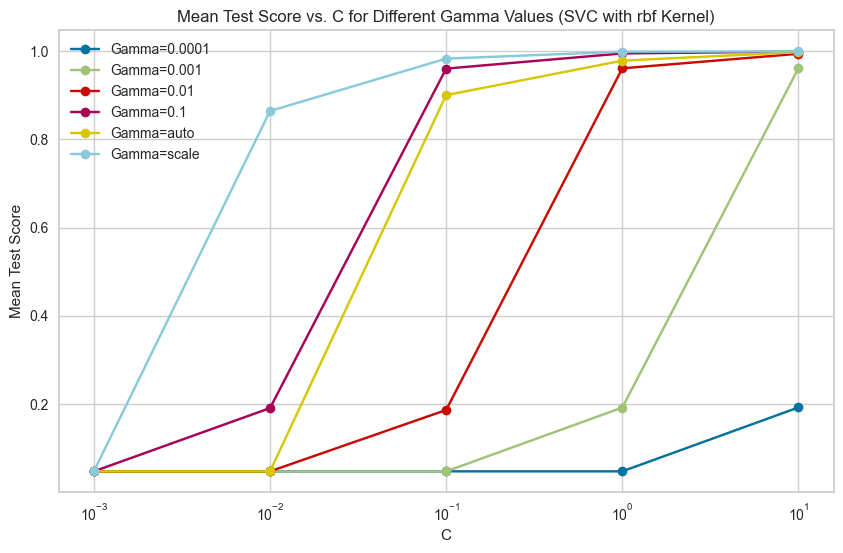

In [228]:


#Liniendiagramm
plt.figure(figsize=(10, 6))

#Linien für verschiedene Gamma-Werte
gamma_values = [0.0001, 0.001, 0.01, 0.1, 'auto', 'scale']
for gamma_value in gamma_values:
    gamma_data = data_mean_test[data_mean_test['param_gamma'] == gamma_value]
    plt.plot(gamma_data['param_C'], gamma_data['mean_test_score'], label=f'Gamma={gamma_value}', marker='o')

plt.title('Mean Test Score vs. C for Different Gamma Values (SVC with rbf Kernel)')
plt.xlabel('C')
plt.ylabel('Mean Test Score')
plt.xscale('log')
plt.legend()
plt.grid(True)
plt.show()

In [229]:
#'mean_test_score' in Abhängigkeit von 'C' und 'gamma' (mit Kernel 'rbf')
data_mean_test = result_frame_svc_svm[result_frame_svc_svm['param_kernel'] == 'rbf'][['param_C', 'param_gamma', 'mean_train_score']]

#param_gamma in Gleitkommazahlen
data_mean_test['param_gamma'] = data_mean_test['param_gamma'].apply(lambda x: x if x in [0.0001, 0.001, 0.01, 0.1, 'auto', 'scale'] else float(x))

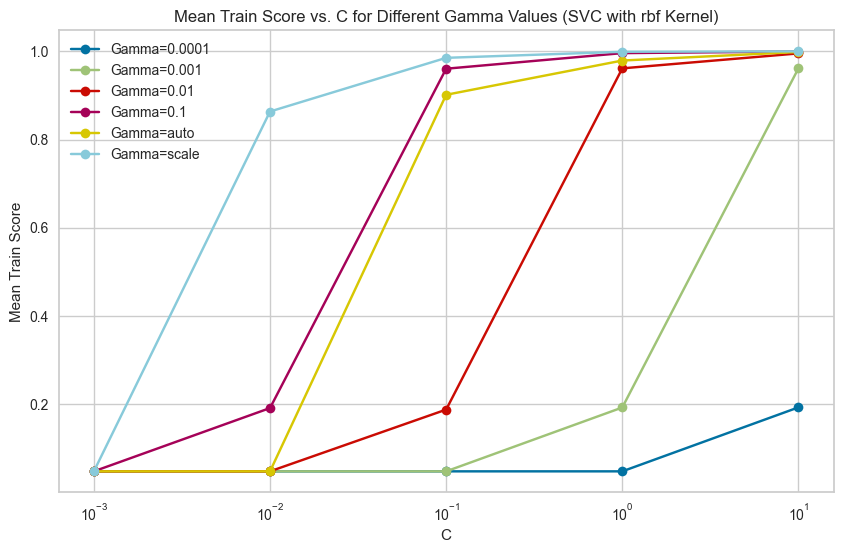

In [230]:
#Liniendiagramm
plt.figure(figsize=(10, 6))

#Linien für verschiedene Gamma-Werte
gamma_values = [0.0001, 0.001, 0.01, 0.1, 'auto', 'scale']
for gamma_value in gamma_values:
    gamma_data = data_mean_test[data_mean_test['param_gamma'] == gamma_value]
    plt.plot(gamma_data['param_C'], gamma_data['mean_train_score'], label=f'Gamma={gamma_value}', marker='o')

plt.title('Mean Train Score vs. C for Different Gamma Values (SVC with rbf Kernel)')
plt.xlabel('C')
plt.ylabel('Mean Train Score')
plt.xscale('log')
plt.legend()
plt.grid(True)
plt.show()

## Modell mit gamme='scale' trainieren

In [231]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
#Hyperparameter search space
hyperparameter_search_space_svm_2 = {
      'C':[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.08, 0.09, 0.11, 0.13, 0.16, 0.19, 
           0.23, 0.28, 0.34, 0.41, 0.49, 0.6, 0.72, 0.87, 1.0, 1.05, 1.1 ,1.20, 1.40 ,1.53, 1.84, 
           2.0, 2.22, 2.68, 3.0, 3.24, 3.91, 4.71, 5.0, 5.69, 6.0, 6.87, 7.0, 8.0, 8.29, 9.0, 10.0],

    'kernel': ['rbf'],
    'gamma': ['scale']
}

#Initialisierung der SVC Models
svm_svc_2 = SVC()

#Grid Search 
grid_search_svm_svc_2 = GridSearchCV(estimator=svm_svc, param_grid=hyperparameter_search_space_svm_2, scoring='accuracy', cv=5, n_jobs=-1,return_train_score=True)

#Durchführen der Grid Search
grid_search_svm_svc_2.fit(x_train, y_train)

#Erstellung eines Ergebnisdatenrahmens
grid_search_svm_svc_2 =pd.DataFrame(grid_search_svm_svc_2.cv_results_)
grid_search_svm_svc_2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,6.310392,0.288346,3.099028,0.161561,0.01,scale,rbf,"{'C': 0.01, 'gamma': 'scale', 'kernel': 'rbf'}",0.860693,0.854712,...,0.864023,0.006488,43,0.857657,0.863733,0.866678,0.863733,0.865860,0.863532,0.003159
1,4.354433,0.274172,2.807813,0.254800,0.02,scale,rbf,"{'C': 0.02, 'gamma': 'scale', 'kernel': 'rbf'}",0.943754,0.945026,...,0.942808,0.003033,42,0.945353,0.938819,0.938328,0.946671,0.947980,0.943430,0.004054
2,3.329523,0.262724,2.942753,0.142618,0.03,scale,rbf,"{'C': 0.03, 'gamma': 'scale', 'kernel': 'rbf'}",0.958143,0.960079,...,0.956681,0.004087,41,0.956806,0.956486,0.954523,0.958940,0.959104,0.957172,0.001702
3,2.944368,0.173445,2.918613,0.260149,0.04,scale,rbf,"{'C': 0.04, 'gamma': 'scale', 'kernel': 'rbf'}",0.962721,0.966623,...,0.962439,0.004005,40,0.964496,0.963520,0.962702,0.964338,0.964829,0.963977,0.000769
4,2.459953,0.103479,2.807850,0.170828,0.05,scale,rbf,"{'C': 0.05, 'gamma': 'scale', 'kernel': 'rbf'}",0.967953,0.969895,...,0.967020,0.004489,39,0.968914,0.968755,0.967610,0.967937,0.969737,0.968591,0.000753
5,2.444561,0.224459,2.588776,0.115384,0.06,scale,rbf,"{'C': 0.06, 'gamma': 'scale', 'kernel': 'rbf'}",0.972531,0.973168,...,0.971077,0.003826,38,0.972677,0.973336,0.971863,0.971863,0.973008,0.972549,0.000598
6,1.830591,0.200026,2.115609,0.086362,0.08,scale,rbf,"{'C': 0.08, 'gamma': 'scale', 'kernel': 'rbf'}",0.978417,0.979058,...,0.977882,0.003025,37,0.979058,0.980860,0.979061,0.978243,0.977916,0.979028,0.001021
7,1.563137,0.078799,2.039275,0.070673,0.09,scale,rbf,"{'C': 0.09, 'gamma': 'scale', 'kernel': 'rbf'}",0.980379,0.981021,...,0.979976,0.003429,36,0.982166,0.986095,0.982496,0.981024,0.980043,0.982365,0.002057
8,1.322377,0.053004,1.897693,0.025882,0.11,scale,rbf,"{'C': 0.11, 'gamma': 'scale', 'kernel': 'rbf'}",0.989536,0.983639,...,0.986781,0.002665,35,0.987729,0.990185,0.988385,0.987240,0.987567,0.988221,0.001050
9,1.180022,0.054509,1.785881,0.091976,0.13,scale,rbf,"{'C': 0.13, 'gamma': 'scale', 'kernel': 'rbf'}",0.992806,0.988220,...,0.990184,0.001986,34,0.990347,0.991166,0.990021,0.990348,0.991003,0.990577,0.000434


##### Mean Train and Test-Sore Diagramm(svm)

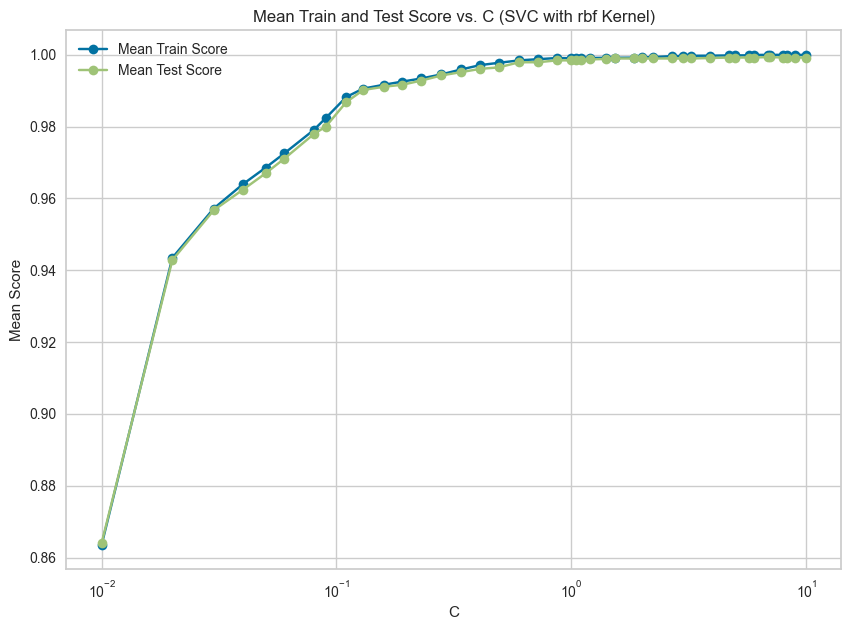

In [237]:
import matplotlib.pyplot as plt

# Datenrahmen 'grid_search_svm_svc_2' enthält die erforderlichen Werte
# Filtern Sie die relevanten Spalten
scores_df = grid_search_svm_svc_2[['param_C', 'mean_train_score', 'mean_test_score']]

# Erstellung des Liniendiagramms
plt.figure(figsize=(10, 7))

# Linien für 'mean_train_score' und 'mean_test_score' erstellen
plt.plot(scores_df['param_C'], scores_df['mean_train_score'], label='Mean Train Score', marker='o')
plt.plot(scores_df['param_C'], scores_df['mean_test_score'], label='Mean Test Score', marker='o')

plt.title('Mean Train and Test Score vs. C (SVC with rbf Kernel)')
plt.xlabel('C')
plt.ylabel('Mean Score')
plt.xscale('log')
plt.legend()

plt.grid(True)
plt.show()


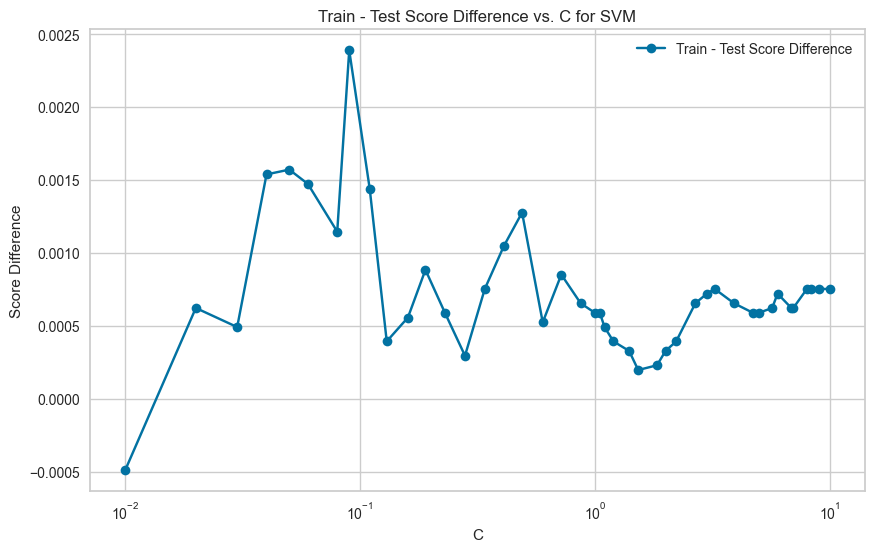

In [234]:

#Berechnung der Differenz
grid_search_svm_svc_2['score_difference'] = grid_search_svm_svc_2['mean_train_score'] - grid_search_svm_svc_2['mean_test_score']

#Erstellung des Linienplots
plt.figure(figsize=(10,6))
plt.plot(grid_search_svm_svc_2['param_C'], grid_search_svm_svc_2['score_difference'], label='Train - Test Score Difference', marker='o')
plt.title('Train - Test Score Difference vs. C for SVM')
plt.xlabel('C')
plt.ylabel('Score Difference')
plt.xscale('log')
plt.legend()
plt.grid(True)
plt.show()

In [235]:
#'mean_test_score' größer oder gleich 0.95
filtered_df = grid_search_svm_svc_2[grid_search_svm_svc_2['mean_test_score'] >= 0.95]

#'score_difference' in aufsteigender Reihenfolge
sorted_df = filtered_df.sort_values(by='score_difference', ascending=True)

#obersten 5 Zeilen aus dem sortierten DataFrame
top_5 = sorted_df.head(5)[['param_C', 'mean_test_score','score_difference']]

print(top_5)

   param_C  mean_test_score  score_difference
25    1.53         0.998953          0.000196
26    1.84         0.998953          0.000229
13    0.28         0.994242          0.000295
27     2.0         0.998953          0.000327
24     1.4         0.998822          0.000327


###### Anmerkung: Habe später bemerkt, dass nur einige Kommentare falsch sind, z.B. in nächsten Block [239], dann beim Testen anderer Lernalgorithmen(wie svc in Block 239) steht dort auch der Kommentar "randomforstClassifier", habe ihn absichtlich gelassen, weil die Neukompilierung zu anderen Werten führen kann, also muss die Dokumentation komplett aktualisiert werden, Grund war, dass ich den gleichen Codeblock ausführen wollte, aber vergessen habe, einige Kommentare zu ändern.
###### Abdalla

In [239]:
from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix

highest_cross_val = 0.0
# Definition der auffälligen C-Parameter
c_parameters = [1.53,1.84, 0.28,2.0, 1.4]
model_nr=[25,26,13 ,27,24]
validation_values = []  # Initialisiere die Liste

best_c_value = 0

for index, c in enumerate(c_parameters):
    # Erstellung des Random Forest Klassifikators
    best_svm_model = SVC(C=c,kernel='rbf',gamma='scale')

    kfold = KFold(n_splits=5)
    scores = cross_val_score(best_svm_model, x_train, y_train, cv=kfold, scoring='accuracy')
    average_accuracy = scores.mean()
    
    # Hinzufügen des Durchschnittswerts zur Liste
    validation_values.append(average_accuracy)

    print('Model Nr.',model_nr[index],' mit C = ', c)
    print('Cross-Validation Accuracy : ', average_accuracy * 100, '%')
    
    if average_accuracy >= highest_cross_val:
        highest_cross_val = average_accuracy
        best_c_value = c

    best_svm_model_after_validation = best_svm_model.fit(x_train, y_train)
    test_accuracy = best_svm_model_after_validation.score(x_test, y_test)
    print('Accuracy : ', test_accuracy * 100, '%\n')

# Vorhersage der Labels für die Testdaten
y_predict = best_svm_model_after_validation.predict(x_test)

print("Bestes SVC Modell  (C = " + str(best_c_value) + " und Cross-Validation Accuracy: " + str(highest_cross_val) + ")")

Model Nr. 25  mit C =  1.53
Cross-Validation Accuracy :  99.89528795811518 %
Accuracy :  100.0 %

Model Nr. 26  mit C =  1.84
Cross-Validation Accuracy :  99.90837696335078 %
Accuracy :  99.96947496947497 %

Model Nr. 13  mit C =  0.28
Cross-Validation Accuracy :  99.39794856166472 %
Accuracy :  99.51159951159951 %

Model Nr. 27  mit C =  2.0
Cross-Validation Accuracy :  99.90837696335078 %
Accuracy :  99.96947496947497 %

Model Nr. 24  mit C =  1.4
Cross-Validation Accuracy :  99.89528795811518 %
Accuracy :  100.0 %

Bestes SVC Modell  (C = 2.0 und Cross-Validation Accuracy: 0.9990837696335078)


### Konfusionsmatrix für die beste SVC Modell ( C =2.0 )

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix

#Erstellung des SVC Klassifikators
SVC_model_C_2 = SVC(C=2.0,kernel='rbf',gamma='scale')

kfold = KFold(n_splits=5) 
scores = cross_val_score(SVC_model_C_2, x_train, y_train, cv=kfold, scoring='accuracy')
average_accuracy = scores.mean()
print('Cross-Validation Accuracy : ', average_accuracy * 100, '%')

SVC_model_C_2_after_val = SVC_model_C_2.fit(x_train, y_train)
test_accuracy = SVC_model_C_2_after_val.score(x_test, y_test)
print('Accuracy : ', test_accuracy * 100, '%')

#Vorhersage der Labels für die Testdaten
y_predict = SVC_model_C_2_after_val.predict(x_test)

#Erstellung der ConfusionMatrix
cm = ConfusionMatrix(SVC_model_C_2_after_val, classes=np.unique(labels))
cm.fit(x_train, y_train)
cm.score(x_test, y_test)
cm.show()

## SGDClassifier Stochastic Gradient Descent

In [241]:
from sklearn.linear_model import SGDClassifier

#Hyperparameters
hyperparameters_sgd_classifier = {
    'loss': ['hinge'],
    'penalty': ['l2'],
    'alpha': [0.0001, 0.001, 0.01,0.1],
    'max_iter': [50,100,300, 500, 1000,2000],
    'learning_rate': ['optimal']
}
#Definition der SGDClassifier
sgd_clf = SGDClassifier()

# GridSearchCV
grid_search_sgd_classifier = GridSearchCV(estimator=sgd_clf, param_grid=hyperparameters_sgd_classifier, cv=3, n_jobs=-1,return_train_score=True)
grid_search_sgd_classifier.fit(x_train, y_train)

#Erstellung eines Ergebnis DataFrames
result_frame_sgd_classifier =pd.DataFrame(grid_search_sgd_classifier.cv_results_)
result_frame_sgd_classifier

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_learning_rate,param_loss,param_max_iter,param_penalty,params,...,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.627565,0.121234,0.004867,0.001269,0.0001,optimal,hinge,50,l2,"{'alpha': 0.0001, 'learning_rate': 'optimal', ...",...,0.989007,0.987436,0.987829,0.000848,6,0.986455,0.989399,0.991362,0.989072,0.002017
1,0.715444,0.129052,0.007384,0.002881,0.0001,optimal,hinge,100,l2,"{'alpha': 0.0001, 'learning_rate': 'optimal', ...",...,0.991362,0.981940,0.989007,0.005089,5,0.992540,0.993522,0.988025,0.991362,0.002394
2,0.707610,0.133141,0.004531,0.000730,0.0001,optimal,hinge,300,l2,"{'alpha': 0.0001, 'learning_rate': 'optimal', ...",...,0.992540,0.989007,0.990970,0.001469,2,0.987829,0.993129,0.993522,0.991493,0.002596
3,0.591224,0.015028,0.004496,0.001075,0.0001,optimal,hinge,500,l2,"{'alpha': 0.0001, 'learning_rate': 'optimal', ...",...,0.991362,0.987829,0.990054,0.001581,3,0.988810,0.992344,0.993522,0.991559,0.002002
4,0.731995,0.037523,0.003171,0.000240,0.0001,optimal,hinge,1000,l2,"{'alpha': 0.0001, 'learning_rate': 'optimal', ...",...,0.992148,0.990577,0.992278,0.001446,1,0.990970,0.992344,0.994503,0.992606,0.001454
5,0.635125,0.073759,0.003511,0.000002,0.0001,optimal,hinge,2000,l2,"{'alpha': 0.0001, 'learning_rate': 'optimal', ...",...,0.990185,0.983903,0.989138,0.003917,4,0.992933,0.989988,0.988614,0.990512,0.001802
6,0.518324,0.101249,0.007384,0.004539,0.001,optimal,hinge,50,l2,"{'alpha': 0.001, 'learning_rate': 'optimal', '...",...,0.982332,0.977228,0.980238,0.002182,7,0.978799,0.984099,0.980762,0.981220,0.002188
7,0.436239,0.017149,0.005031,0.000715,0.001,optimal,hinge,100,l2,"{'alpha': 0.001, 'learning_rate': 'optimal', '...",...,0.978406,0.981547,0.980107,0.001296,8,0.978799,0.982528,0.987436,0.982921,0.003537
8,0.431014,0.035453,0.003856,0.000864,0.001,optimal,hinge,300,l2,"{'alpha': 0.001, 'learning_rate': 'optimal', '...",...,0.978799,0.978013,0.977359,0.001515,10,0.975461,0.979976,0.979388,0.978275,0.002004
9,0.471713,0.033301,0.004352,0.001560,0.001,optimal,hinge,500,l2,"{'alpha': 0.001, 'learning_rate': 'optimal', '...",...,0.973695,0.977228,0.977752,0.003546,9,0.979780,0.978210,0.980958,0.979649,0.001126


In [242]:
# Speichung der Ergebnisse in eine csv-Datei
result_frame_sgd_classifier.to_csv('result_frame_sgd_classifier.csv', index=False)

In [243]:
#Bestimmte spalten ausgeben
result_frame_sgd_classifier[['rank_test_score','mean_train_score','mean_test_score','params']]

,rank_test_score,mean_train_score,mean_test_score,params
0,6,0.989072,0.987829,"{'alpha': 0.0001, 'learning_rate': 'optimal', ..."
1,5,0.991362,0.989007,"{'alpha': 0.0001, 'learning_rate': 'optimal', ..."
2,2,0.991493,0.990970,"{'alpha': 0.0001, 'learning_rate': 'optimal', ..."
3,3,0.991559,0.990054,"{'alpha': 0.0001, 'learning_rate': 'optimal', ..."
4,1,0.992606,0.992278,"{'alpha': 0.0001, 'learning_rate': 'optimal', ..."
5,4,0.990512,0.989138,"{'alpha': 0.0001, 'learning_rate': 'optimal', ..."
6,7,0.981220,0.980238,"{'alpha': 0.001, 'learning_rate': 'optimal', '..."
7,8,0.982921,0.980107,"{'alpha': 0.001, 'learning_rate': 'optimal', '..."
8,10,0.978275,0.977359,"{'alpha': 0.001, 'learning_rate': 'optimal', '..."
9,9,0.979649,0.977752,"{'alpha': 0.001, 'learning_rate': 'optimal', '..."


In [244]:
import pandas as pd
import matplotlib.pyplot as plt
import json

#Datei in einen DataFrame umwandeln
file_path = 'result_frame_sgd_classifier.csv'

result_frame_sgd_classifier = pd.read_csv(file_path)

#Umwandung der 'params' Spalte in Python Dictionaries
params = result_frame_sgd_classifier['params'].apply(lambda x: json.loads(x.replace("'", "\"")))

#param_max_iter und param_alpha Werte extrahieren
max_iter_values = [param['max_iter'] for param in params]
alpha_values = [param['alpha'] for param in params]


# Hinzufügen der extrahierten Werte als Spalten in den DataFrame
result_frame_sgd_classifier['param_max_iter'] = max_iter_values
result_frame_sgd_classifier['param_alpha'] = alpha_values

# Filtern der Daten nach param_max_iter und param_alpha und Erstellen von Linienplots für mean_test_score und mean_train_score
max_iter_values = result_frame_sgd_classifier['param_max_iter'].unique()
alpha_values = result_frame_sgd_classifier['param_alpha'].unique()

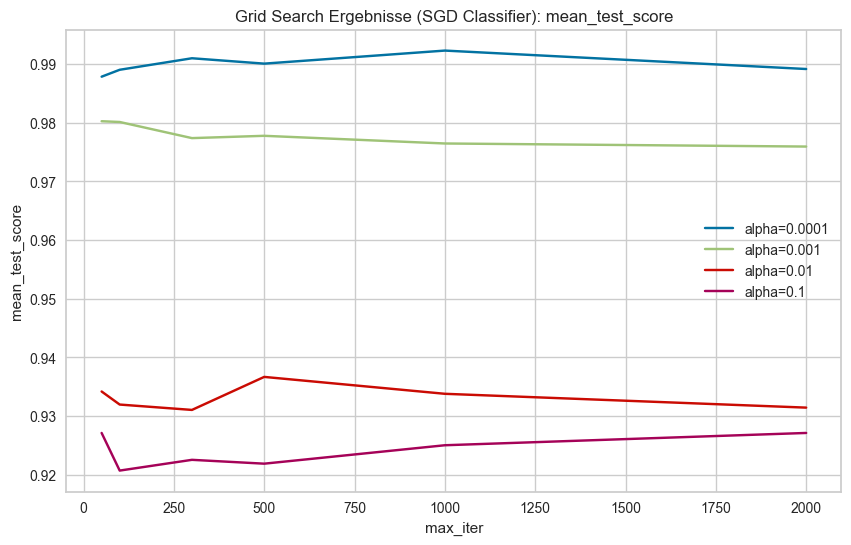

In [246]:
# Erstellen eines Linienplots für mean_test_score
plt.figure(figsize=(10, 6))
for alpha in alpha_values:
    filtered_data = result_frame_sgd_classifier[result_frame_sgd_classifier['param_alpha'] == alpha]
    plt.plot(filtered_data['param_max_iter'], filtered_data['mean_test_score'], label=f'alpha={alpha}')

# Einstellungen für das Diagramm (mean_test_score)
plt.xlabel('max_iter')
plt.ylabel('mean_test_score')
plt.legend()
plt.title('Grid Search Ergebnisse (SGD Classifier): mean_test_score')
plt.grid(True)

# Anzeigen des Linienplots (mean_test_score)
plt.show()


In [247]:
from sklearn.linear_model import SGDClassifier

#Hyperparameters
hyperparameters_sgd_classifier_2 = {
    'loss': ['hinge'],
    'penalty': ['l2'],
    'alpha': [0.0001,0.0002,0.0004,0.0006,0.0007,0.0009,
              0.001, 0.003, 0.005, 0.007, 0.009, 0.001,
              0.01,0.03,0.05,0.07,0.09,
              0.1,0.3,0.5,0.7,0.9,1.1,
             2,3,4,5,6,7,8,9,10 ],
    'max_iter': [1500],
    'learning_rate': ['optimal']
}
#Definition der SGDClassifier
sgd_clf = SGDClassifier()

# GridSearchCV
grid_search_sgd_classifier_2 = GridSearchCV(estimator=sgd_clf, param_grid=hyperparameters_sgd_classifier_2, cv=3, n_jobs=-1,return_train_score=True)
grid_search_sgd_classifier_2.fit(x_train, y_train)

#Erstellung eines Ergebnis DataFrames
result_frame_sgd_classifier_2 =pd.DataFrame(grid_search_sgd_classifier_2.cv_results_)
result_frame_sgd_classifier_2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_learning_rate,param_loss,param_max_iter,param_penalty,params,...,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.502979,0.085561,0.007537,0.002676,0.0001,optimal,hinge,1500,l2,"{'alpha': 0.0001, 'learning_rate': 'optimal', ...",...,0.989007,0.985080,0.989138,0.003367,1,0.993522,0.991166,0.991362,0.992017,0.001067
1,0.578596,0.054166,0.006010,0.002543,0.0002,optimal,hinge,1500,l2,"{'alpha': 0.0002, 'learning_rate': 'optimal', ...",...,0.986258,0.977228,0.982725,0.003939,4,0.983314,0.988025,0.985080,0.985473,0.001943
2,0.515985,0.058797,0.005996,0.003184,0.0004,optimal,hinge,1500,l2,"{'alpha': 0.0004, 'learning_rate': 'optimal', ...",...,0.985866,0.985473,0.985735,0.000185,2,0.984492,0.985669,0.991362,0.987174,0.003000
3,0.451270,0.008737,0.003701,0.000480,0.0006,optimal,hinge,1500,l2,"{'alpha': 0.0006, 'learning_rate': 'optimal', ...",...,0.980369,0.981547,0.983641,0.003825,3,0.987436,0.981743,0.987633,0.985604,0.002731
4,0.452773,0.025518,0.004024,0.000022,0.0007,optimal,hinge,1500,l2,"{'alpha': 0.0007, 'learning_rate': 'optimal', ...",...,0.982332,0.978799,0.982725,0.003377,4,0.983117,0.982921,0.984688,0.983575,0.000791
5,0.421282,0.019743,0.004355,0.000963,0.0009,optimal,hinge,1500,l2,"{'alpha': 0.0009, 'learning_rate': 'optimal', ...",...,0.979191,0.978406,0.980238,0.002061,6,0.981940,0.981547,0.981547,0.981678,0.000185
6,0.434288,0.025076,0.003695,0.000497,0.001,optimal,hinge,1500,l2,"{'alpha': 0.001, 'learning_rate': 'optimal', '...",...,0.976443,0.972517,0.976312,0.003047,7,0.977032,0.981743,0.975069,0.977948,0.002801
7,0.384030,0.017075,0.004181,0.000233,0.003,optimal,hinge,1500,l2,"{'alpha': 0.003, 'learning_rate': 'optimal', '...",...,0.955241,0.948567,0.953409,0.003458,9,0.954456,0.951119,0.954653,0.953409,0.001621
8,0.333817,0.012752,0.003535,0.000018,0.005,optimal,hinge,1500,l2,"{'alpha': 0.005, 'learning_rate': 'optimal', '...",...,0.950923,0.940322,0.943856,0.004997,10,0.940518,0.948567,0.946800,0.945295,0.003454
9,0.331441,0.004649,0.003729,0.000233,0.007,optimal,hinge,1500,l2,"{'alpha': 0.007, 'learning_rate': 'optimal', '...",...,0.943070,0.934040,0.938882,0.003716,11,0.939929,0.944052,0.940126,0.941369,0.001899


##### Daten aus der DataFrame direkt entnommen

In [ ]:

#Filtern der Daten mit max_iter = 1500, wenn mehrere max_iter gesucht werden.
#filtered_data = result_frame_sgd_classifier_2[result_frame_sgd_classifier_2['param_max_iter'] == 1500]

#'mean_train_score' und 'mean_test_score' in Abhängigkeit von 'alpha'
data_mean_train = result_frame_sgd_classifier_2[['param_alpha', 'mean_train_score']]
data_mean_test = result_frame_sgd_classifier_2[['param_alpha', 'mean_test_score']]

##### Linienplots Einstellung

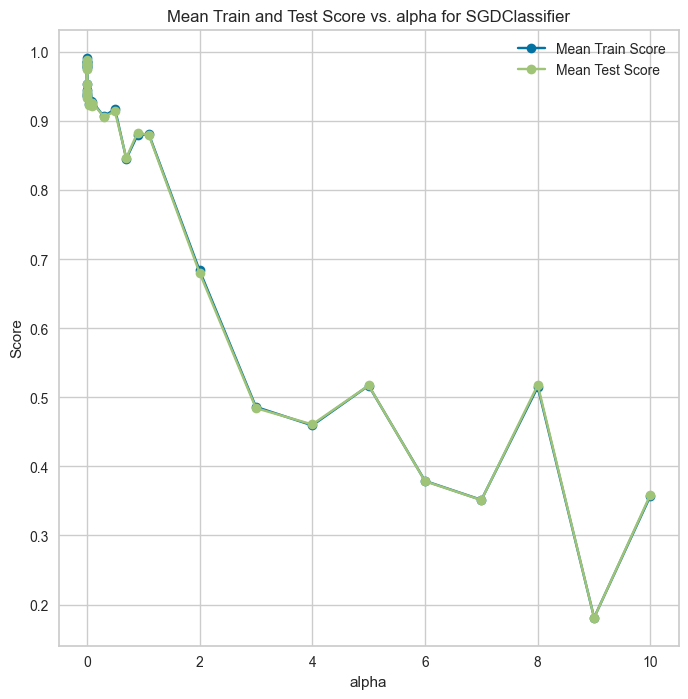

In [254]:
#Erstellung der Linienplots
plt.figure(figsize=(8, 8))
plt.plot(data_mean_train['param_alpha'], data_mean_train['mean_train_score'], label='Mean Train Score', marker='o')
plt.plot(data_mean_test['param_alpha'], data_mean_test['mean_test_score'], label='Mean Test Score', marker='o')
plt.title('Mean Train and Test Score vs. alpha for SGDClassifier')
plt.xlabel('alpha')
plt.ylabel('Score') 
plt.legend()
plt.grid(True)
plt.show()

#### Differenzen zwischen mean_train_score und mean_test_score

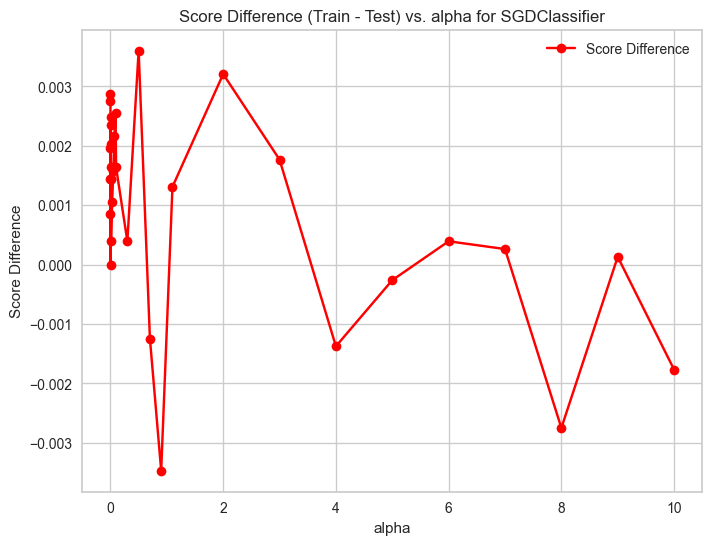

In [258]:
import matplotlib.pyplot as plt

# Differenzen Berechnung
result_frame_sgd_classifier_2['score_difference'] = result_frame_sgd_classifier_2['mean_train_score'] - result_frame_sgd_classifier_2['mean_test_score']

# Linienplots
plt.figure(figsize=(8, 6))
plt.plot(result_frame_sgd_classifier_2['param_alpha'], result_frame_sgd_classifier_2['score_difference'], label='Score Difference', marker='o', color='red')
plt.title('Score Difference (Train - Test) vs. alpha for SGDClassifier')
plt.xlabel('alpha')
plt.ylabel('Score Difference')
plt.legend()
plt.grid(True)
plt.show()


In [262]:
#'mean_test_score' größer oder gleich 0.95
filtered_df = result_frame_sgd_classifier_2[result_frame_sgd_classifier_2['mean_test_score'] >= 0.95]

#'score_difference' in aufsteigender Reihenfolge
sorted_df = filtered_df.sort_values(by='score_difference', ascending=True)

#obersten 5 Zeilen aus dem sortierten DataFrame
top_5 = sorted_df.head(5)[['param_alpha', 'mean_test_score','score_difference']]

print(top_5)

  param_alpha  mean_test_score  score_difference
7       0.003         0.953409          0.000000
4      0.0007         0.982725          0.000851
2      0.0004         0.985735          0.001440
5      0.0009         0.980238          0.001440
6       0.001         0.976312          0.001636


#### Kreuzvalidierung Genauigkeit

In [269]:
from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.linear_model import SGDClassifier

highest_cross_val = 0.0
# Definition der auffälligen Alpha-Parameter
alpha_parameters = [0.003, 0.0007, 0.0004, 0.0009, 0.001]
model_nr = [7, 4, 2, 5, 6]
validation_values = [] 

best_alpha_parameter = 0

for index, alpha in enumerate(alpha_parameters):
    # Erstellung des SGDClassifier mit den Parametern
    best_SGDClassifier = SGDClassifier(loss='hinge', alpha=alpha, max_iter=1500, random_state=None, learning_rate='optimal', penalty='l2')

    kfold = KFold(n_splits=5)
    scores = cross_val_score(best_SGDClassifier, x_train, y_train, cv=kfold, scoring='accuracy')
    average_accuracy = scores.mean()
    
    # Durchschnittswerts einfügen
    validation_values.append(average_accuracy)

    print('Model Nr.', model_nr[index], ' mit Alpha = ', alpha)
    print('Cross-Validation Accuracy : ', average_accuracy * 100, '%')
    
    if average_accuracy >= highest_cross_val:
        highest_cross_val = average_accuracy
        best_alpha_parameter = alpha

    best_SGDClassifier_after_validation = best_SGDClassifier.fit(x_train, y_train)
    test_accuracy = best_SGDClassifier_after_validation.score(x_test, y_test)
    print('Accuracy : ', test_accuracy * 100, '%\n')

# Vorhersage der Labels für die Testdaten
y_predict = best_SGDClassifier_after_validation.predict(x_test)

print("Bestes SGDClassifier Modell  (Alpha = " + str(best_alpha_parameter) + " und Cross-Validation Accuracy: " + str(highest_cross_val) + ")")


Model Nr. 7  mit Alpha =  0.003
Cross-Validation Accuracy :  95.19687439006435 %
Accuracy :  95.2991452991453 %

Model Nr. 4  mit Alpha =  0.0007
Cross-Validation Accuracy :  98.16771903752579 %
Accuracy :  98.19902319902319 %

Model Nr. 2  mit Alpha =  0.0004
Cross-Validation Accuracy :  98.75663010762261 %
Accuracy :  98.77899877899878 %

Model Nr. 5  mit Alpha =  0.0009
Cross-Validation Accuracy :  97.8405195881372 %
Accuracy :  97.92429792429792 %

Model Nr. 6  mit Alpha =  0.001
Cross-Validation Accuracy :  97.65720503083493 %
Accuracy :  98.01587301587301 %

Bestes SGDClassifier Modell  (Alpha = 0.0004 und Cross-Validation Accuracy: 0.9875663010762261)


### Beste SGD_Classifier

Cross-Validation Accuracy :  98.5211050578861 %
Accuracy :  98.56532356532357 %


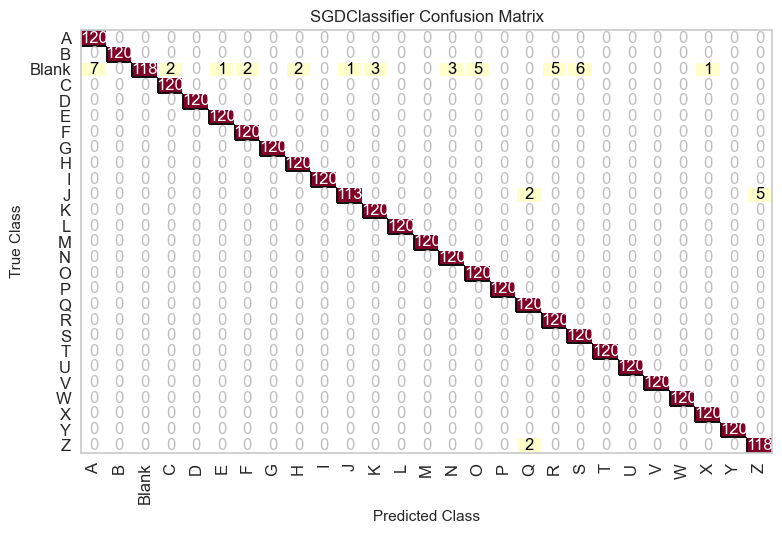

<Axes: title={'center': 'SGDClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [270]:
from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix

#Erstellung des SGDClassifier Klassifikators
SGDClassifier_model = SGDClassifier(loss='hinge', alpha=0.0004 , max_iter=1500, random_state=None, learning_rate='optimal', penalty='l2')

kfold = KFold(n_splits=5) 
scores = cross_val_score(SGDClassifier_model, x_train, y_train, cv=kfold, scoring='accuracy')
average_accuracy = scores.mean()
print('Cross-Validation Accuracy : ', average_accuracy * 100, '%')

SGDClassifier_model_after_val = SGDClassifier_model.fit(x_train, y_train)
test_accuracy = SGDClassifier_model_after_val.score(x_test, y_test)
print('Accuracy : ', test_accuracy * 100, '%')

#Vorhersage der Labels für die Testdaten
y_predict = SGDClassifier_model_after_val.predict(x_test)

#Erstellung der ConfusionMatrix
cm = ConfusionMatrix(SGDClassifier_model_after_val, classes=np.unique(labels))
cm.fit(x_train, y_train)
cm.score(x_test, y_test)
cm.show()

In [273]:
from sklearn.metrics import classification_report
report = classification_report(y_test,y_predict)
# Ausgabe
print(report)

              precision    recall  f1-score   support

           A       0.94      1.00      0.97       120
           B       1.00      1.00      1.00       120
       Blank       1.00      0.76      0.86       156
           C       0.98      1.00      0.99       120
           D       1.00      1.00      1.00       120
           E       0.99      1.00      1.00       120
           F       0.98      1.00      0.99       120
           G       1.00      1.00      1.00       120
           H       0.98      1.00      0.99       120
           I       1.00      1.00      1.00       120
           J       0.99      0.94      0.97       120
           K       0.98      1.00      0.99       120
           L       1.00      1.00      1.00       120
           M       1.00      1.00      1.00       120
           N       0.98      1.00      0.99       120
           O       0.96      1.00      0.98       120
           P       1.00      1.00      1.00       120
           Q       0.97    

## Modell für die linke Hand

In [31]:
#Bibliotheken
import pickle
from sklearn.model_selection import GridSearchCV, train_test_split
import numpy as np
import pandas as pd

In [64]:
# Laden der Daten aus der Pickle-Datei
data_dict = pickle.load(open('./data_left_Hand_A_Z.pickle', 'rb'))
data_left = np.asarray(data_dict['data'])
labels_left = np.asarray(data_dict['labels'])
print(len(labels_left))

10767


In [56]:
#Aufteilung der Daten
x_train_left, x_test_left, y_train_left, y_test_left = train_test_split(data_left, labels_left, test_size=0.3, stratify=labels_left, shuffle=True)

Cross-Validation Accuracy :  100.0 %
Accuracy :  99.9388379204893 %


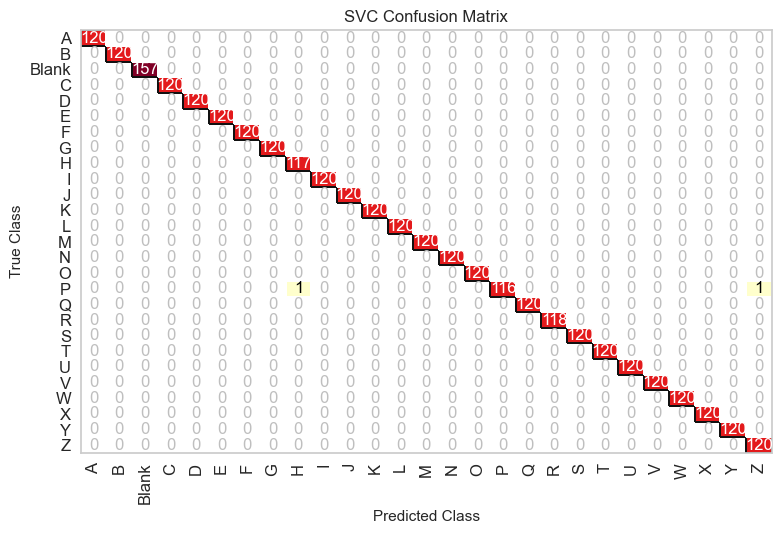

<Axes: title={'center': 'SVC Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [59]:
from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, KFold


#Erstellung des SVC Klassifikators
SVC_model_left = SVC(C=2.0,kernel='rbf',gamma='scale')

kfold = KFold(n_splits=5) 
scores = cross_val_score(SVC_model_left, x_train_left, y_train_left, cv=kfold, scoring='accuracy')
average_accuracy = scores.mean()
print('Cross-Validation Accuracy : ', average_accuracy * 100, '%')

SVC_model_left_after_val = SVC_model_left.fit(x_train_left, y_train_left)
test_accuracy = SVC_model_left_after_val.score(x_test_left, y_test_left)
print('Accuracy : ', test_accuracy * 100, '%')

#Vorhersage der Labels für die Testdaten
y_predict_left = SVC_model_left_after_val.predict(x_test_left)

#Erstellung der ConfusionMatrix
cm = ConfusionMatrix(SVC_model_left, classes=np.unique(labels_left))
cm.set_title("Linke Hand konfusionsmatrix(SVC mit C= 2 und Gamme='scale')")
cm.fit(x_train_left, y_train_left)
cm.score(x_test_left, y_test_left)
cm.show()